In [221]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

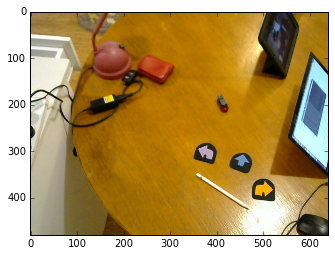

In [222]:
img = cv2.cvtColor(cv2.imread("../videos/frames/frame_1.png"),cv2.COLOR_BGR2RGB)
plt.imshow(img)


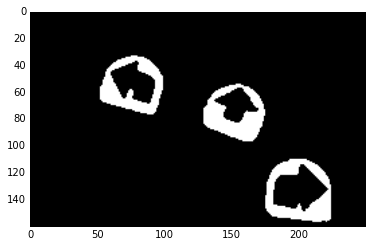

In [254]:
hsv = cv2.cvtColor(cv2.imread("../videos/frames/frame_1.png"),cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,np.asarray([0,0,0]),np.asarray([180,255,60]))
out = cv2.bitwise_and(hsv,hsv,mask=mask)
m = mask[250:410,300:550]
median = cv2.medianBlur(m,3)
plt.imshow(median,cmap="gray")

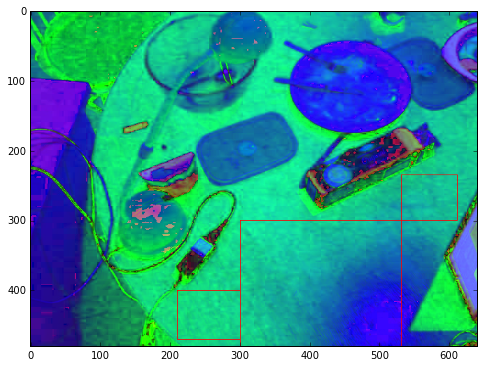

In [211]:
img = cv2.imread("../videos/frames/frame_1.png")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rois = [(300,480,300,530),(400,470,210,300),(235,300,530,610)]
image = hsv.copy()
background = []
for roi in rois:
    ymin,ymax,xmin,xmax = roi
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),1)
    pixels = hsv[ymin:ymax,xmin:xmax]
    w,h,d = pixels.shape
    background.append(pixels.reshape(w*h,1,d))
    
fig, ax = plt.subplots(1,figsize=(8,8))
ax.imshow(image)

In [219]:
img = cv2.imread("../videos/frames/frame_1.png")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rois = [(300,480,300,530),(400,470,210,300),(235,300,530,610)]
image = hsv.copy()
background = []
for roi in rois:
    ymin,ymax,xmin,xmax = roi
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),1)
    pixels = hsv[ymin:ymax,xmin:xmax]
    w,h,d = pixels.shape
    background.append(pixels.reshape(w*h,1,d))

background = np.concatenate(background)
hist = cv2.calcHist([background],[0,1,2],mask = None, histSize = [8,8,2], ranges = [0, 180, 0, 255, 0, 255])
print background.shape[0],hist.sum()
print hist.max(),hist.min()
hist = cv2.normalize(hist,hist,0,1,cv2.NORM_MINMAX)
print hist.max(),hist.min()


np.prod(hist.shape)

52900 51594.0
16153.0 0.0
1.0 0.0


128

In [220]:
hist # we want to divide the new image into the same sets of bins, then for each 

array([[[  0.00000000e+00,   4.61833701e-02],
        [  0.00000000e+00,   1.18368097e-01],
        [  1.23816004e-04,   1.76252082e-01],
        [  0.00000000e+00,   2.34321788e-01],
        [  6.19080020e-05,   3.54237586e-01],
        [  1.85723999e-04,   8.33467424e-01],
        [  4.48213927e-02,   9.99999940e-01],
        [  2.30916850e-02,   1.35207072e-01]],

       [[  0.00000000e+00,   1.48950651e-01],
        [  0.00000000e+00,   1.36197601e-02],
        [  6.19080020e-05,   8.66712013e-04],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.85723999e-04],
        [  0.00000000e+00,   1.23816004e-04],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  0.00000000e+00,   5.37980534e-02],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

print hist.dtype
# are probabilities being clipped inside calcbackproject?
# TODO write your own back project to compare ...
dst = cv2.calcBackProject([orig.astype('float32')],[0,1,2],hist,[0, 180, 0, 256,0,256],scale=1.0) 
ax[0].imshow(dst,cmap="gray")
print dst.min(),dst.max(),dst.dtype
dst = cv2.normalize(dst,dst,0,255,cv2.NORM_MINMAX).astype('uint8')



#_,th3 = cv2.threshold(dst,254,255,cv2.THRESH_BINARY_INV)
ret3,th3 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

res = cv2.bitwise_and(hsv,hsv, mask=th3)

rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
#ax[0].imshow(rgb,interpolation="nearest")
#ax[1].imshow(cv2.bitwise_and(rgb,rgb,mask=th3))


In [175]:
original = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rois = [(250,350,0,180),(168,250,0,40),(170,190,40,165),(25,35,15,180)]
image = original.copy()
background = []
for roi in rois:
    ymin,ymax,xmin,xmax = roi
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),1)
    pixels = fridge[ymin:ymax,xmin:xmax]
    w,h,d = pixels.shape
    background.append(pixels.reshape(w*h,1,d))

background = np.concatenate(background)
hist = cv2.calcHist([background],[0,1,2],mask = None, histSize = [8,8,2], ranges = [0, 180, 0, 255, 0, 255])


print background.shape[0]
print hist.sum()




25430
24724.0


In [174]:
np.prod([2,3])

6

In [84]:
print hist.max(),hist.min()
hist = cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
print hist.max(),hist.min()

fig,ax = plt.subplots(1,2,figsize=(20,10))
print hist.dtype
# are probabilities being clipped inside calcbackproject?
# TODO write your own back project to compare ...
dst = cv2.calcBackProject([fridge.astype('float32')],[0,1,2],hist,[0, 180, 0, 256,0,255],scale=1.0) 
ax[0].imshow(dst)
print dst.min(),dst.max(),dst.dtype
dst = cv2.normalize(dst,dst,0,255,cv2.NORM_MINMAX).astype('uint8')



#_,th3 = cv2.threshold(dst,254,255,cv2.THRESH_BINARY_INV)
ret3,th3 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

res = cv2.bitwise_and(fridge,fridge, mask=th3)
fig,ax = plt.subplots(1,2,figsize=(20,10))
rgb = cv2.cvtColor(fridge,cv2.COLOR_HSV2RGB)
ax[0].imshow(rgb,interpolation="nearest")
ax[1].imshow(cv2.bitwise_and(rgb,rgb,mask=th3))


255

In [ ]:
rois = [(0,0,250,30),(0,150,250,180),(0,150,250,180),(0,150,250,180)]

# plot all the images with the regions we selected as containing grass (note they are all the same shape for convinient stacking)
fig,ax = plt.subplots(2,len(images),figsize = (20,5))

# make an hsv image containing all the grass regions we have selected.
grass = np.vstack((image[ymin:ymax,xmin:xmax] for ((xmin,ymin,xmax,ymax),image) in zip(rois,hsv_images) ))
hist = cv2.calcHist([grass],[0,1],mask = None, histSize = [8,8], ranges = [0, 180, 0, 256])
cv2.normalize(hist,hist,0,1,cv2.NORM_MINMAX)

for indx,image in enumerate(rgb):
    hsv = hsv_images[indx]
    xmin,ymin,xmax,ymax = rois[indx]
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),1)
    ax[0,indx].imshow(image)
    dst = cv2.calcBackProject([hsv],[0,1],hist,[0, 180, 0, 256],scale=255) 
    ax[1,indx].imshow(dst,cmap="gray")
    
fig,ax = plt.subplots()
ax.imshow(hist,interpolation="nearest",cmap="gray")